In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Finite Difference Method

Um metódo de aproximação númerica das derivadas é a diferença finita, esta aproximação pode vir da série de `Taylor` para a função, fazendo aproximações com erros menores, ou da definição de derivada, assim seja $h$ o passo, $u$ a função e $k$ o tempo atual.<br>
Da definição de derivada temos:<br>
$$
\frac{\mathrm{d}u}{\mathrm{d}t}(x) = \lim_{h \to 0} \frac{u(x + h) - u(x)}{h}
$$
Para $h$ suficientemente pequeno podemos escrever:<br>
$$
\frac{\mathrm{d}u}{\mathrm{d}t}(t_k) = \frac{u(t_k + h) - u(t_k)}{h} + \mathcal{O}(h)
$$
onde $\mathcal{O}(h)$ representa um erro de ordem $h$, esta aproximação pode também ser feita andando para trás no dominio, assim:<br>
$$
\frac{\mathrm{d}u}{\mathrm{d}t}(t_k) = \frac{u(t_k) - u(t_k - h)}{h} + \mathcal{O}(h)
$$
Estas são aproximações para derivada por diferença finita, de ordem 1.<br>
Pela expansão de Taylor podemos chegar no mesmo metódo de ordem 1<br>
$$
u(t_k + h) = u(t_k) + hu'(t_k) + h^2\frac{u''(t_k)}{2}+ \dots
$$
Se ignorarmos a partir do segundo termo, podemos considerar:
$$
u(t_k + h) = u(t_k) + hu'(t_k) + h^2\frac{u''(\xi)}{2}
$$
Onde $u''(\xi)$ 'acumula' o erro das derivadas que estamos ignorando, assim podemos reescrever o metódo para a derivada primeira:
$$
\frac{\mathrm{d}u}{\mathrm{d}t}(t_k) = \frac{u(t_k+h) - u(t_k)}{h} - h\frac{u''(\xi)}{2}
$$
E transformando nosso termo em um erro, temos que o erro é de ordem $h$
$$
\frac{\mathrm{d}u}{\mathrm{d}t}(t_k) = \frac{u(t_k+h) - u(t_k)}{h} + \mathcal{O}(h)
$$
Temos assim o Metódo de Diferenças Finitas de ordem 1. É costumeiro representar $u(t_k)$ por $u_k$ e $u(t_k +h)$ por $u_{k+1}$ quando estamos falando da função no valor númerico, enquanto $u(t_k)$ fica para o valor analítico, assim o `FDM` de 1ª ordem fica:
$$
\frac{\mathrm{d}u_{k}}{\mathrm{d}t} = \frac{u_{k+1} - u_k}{h}
$$

<br><br>
Resolvendo uma equação diferencial com o metódo, seja $f'(x) = cos(x)$, queremos descobrir $f(x)$ com $f'(0) = 0$
Queremos encontrar $u_{k+1} \forall k$, então isolando o termo procurado
$$
u_{k+1} =  u_k + h\frac{\mathrm{d}u_{k}}{\mathrm{d}t}
$$

Este é o metódo de Euler, anotações sobre no Notebook referente a metódo de Euler

In [9]:
def dif_eq1(x):
    return np.cos(x)

u0 = 0
h = 0.01
ts = np.arange(-3,3,h)

def fdm_1(F, ts, u0, h):
    us = [u0]
    for t in ts[1:]:
        unew = us[-1] + h*F(t)
        us.append(unew)
    return us

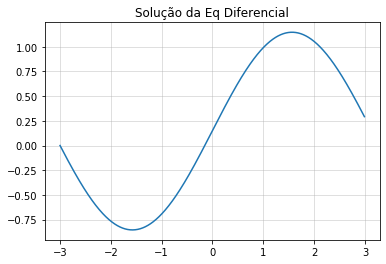

In [10]:
ys = fdm_1(dif_eq1, ts, u0, h)
plt.plot(ts, ys)
plt.grid(alpha = .5)
plt.title('Solução da Eq Diferencial')
plt.show()

### Second Order FDM - Central Difference
Fazendo Taylor para frente e para trás e somando podemos chegar em
$$
\frac{\mathrm{d}u_{k}}{\mathrm{d}t} = \frac{u_{k+1} - u_{k-1}}{2h}
$$